In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import sys
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [24]:
my_data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv', delimiter=',')
my_data.tail(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
180,22,F,HIGH,NORMAL,22.818,drugY
181,59,F,NORMAL,HIGH,13.884,drugX
182,20,F,LOW,NORMAL,11.686,drugX
183,36,F,HIGH,NORMAL,15.490,drugY
184,18,F,HIGH,HIGH,37.188,drugY
185,57,F,NORMAL,NORMAL,25.893,drugY
186,70,M,HIGH,HIGH,9.849,drugB
187,47,M,HIGH,HIGH,10.403,drugA
188,65,M,HIGH,NORMAL,34.997,drugY
189,64,M,HIGH,NORMAL,20.932,drugY


In [4]:
my_data.shape

(200, 6)

In [5]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:10]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368]], dtype=object)

In [6]:
from sklearn import preprocessing

In [7]:
# 

le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 

X[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [20]:
y = my_data["Drug"]
y[0:10]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
5    drugX
6    drugY
7    drugC
8    drugY
9    drugY
Name: Drug, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.4, random_state=4)

In [11]:
print("Train X set : ", X_trainset.shape)
print("Train y set : ", y_trainset.shape)

Train X set :  (120, 5)
Train y set :  (120,)


In [12]:
print("Test X set : ", X_testset.shape)
print("Test y set : ", y_testset.shape)

Test X set :  (80, 5)
Test y set :  (80,)


In [13]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree 
# it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
predTree = drugTree.predict(X_testset)

In [26]:
predTree[0:10]

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX', 'drugY',
       'drugY', 'drugY', 'drugA'], dtype=object)

In [27]:
y_testset[0:20]

11     drugY
99     drugY
128    drugY
175    drugY
1      drugC
111    drugX
90     drugY
177    drugY
88     drugY
187    drugA
61     drugA
199    drugX
191    drugA
123    drugY
184    drugY
188    drugY
33     drugY
171    drugX
138    drugB
84     drugC
Name: Drug, dtype: object

In [28]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decisiontree's Accuracy : ", metrics.accuracy_score(y_testset, predTree))

Decisiontree's Accuracy :  0.975


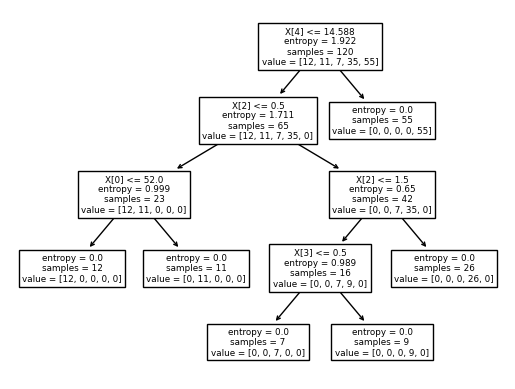

In [29]:
tree.plot_tree(drugTree)
plt.show()